<a href="https://colab.research.google.com/github/tranitapalmer/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/DS16_Unit_1_Sprint_Challenge_1_Data_Wrangling_and_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

geo_country_codes = geo_country_codes[['geo','country']]

In [6]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


Check for missing/null values in the three dataframes

In [5]:
# Your Work Here
cell_phones.isnull().values.any()

population.isnull().values.any()

geo_country_codes.isnull().values.any()

False

Make a scatter plot from the `cell_phones` dataframe plotting "time" against "cell_phones_total"

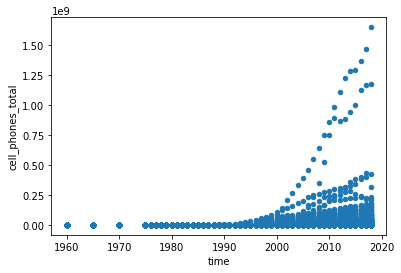

In [16]:
# Your Work Here

df = cell_phones

df.plot.scatter(x='time',y='cell_phones_total');


### Part 2 - Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

We merge data to make the graph readable and not to have repeated content to confuse the reade

We merge these dat into one cell to make the graph readable and to not repeat the same data. It will make it confusing to the reader.

In [19]:
# Your Work Here
cell_phones.head()



,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [20]:
population.head()


,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [65]:
pd.merge(cell_phones[["cell_phones_total", 'geo', 'time']], population[['geo','time', 'population_total']])


,cell_phones_total,geo,time,population_total
0,0.0,afg,1960,8996967
1,0.0,afg,1965,9956318
2,0.0,afg,1970,11173654
3,0.0,afg,1975,12689164
4,0.0,afg,1976,12943093
...,...,...,...,...
8781,11798652.0,zwe,2014,13586710
8782,12757410.0,zwe,2015,13814642
8783,12878926.0,zwe,2016,14030338
8784,14092104.0,zwe,2017,14236599


In [66]:
pd.merge(cell_phones[["cell_phones_total", 'geo', 'time']], population[['geo','time', 'population_total']]).shape


(8786, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [24]:
# Your Work Here
geo_country_codes.head()


,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [70]:
pd.merge(cell_phones[["cell_phones_total", 'geo', 'time']], population[['geo','time', 'population_total']]), geo_country_codes[['geo', 'country']]



(      cell_phones_total  geo  time  population_total
 0                   0.0  afg  1960           8996967
 1                   0.0  afg  1965           9956318
 2                   0.0  afg  1970          11173654
 3                   0.0  afg  1975          12689164
 4                   0.0  afg  1976          12943093
 ...                 ...  ...   ...               ...
 8781         11798652.0  zwe  2014          13586710
 8782         12757410.0  zwe  2015          13814642
 8783         12878926.0  zwe  2016          14030338
 8784         14092104.0  zwe  2017          14236599
 8785         12908992.0  zwe  2018          14438812
 
 [8786 rows x 4 columns],            geo               country
 0         abkh              Abkhazia
 1          abw                 Aruba
 2          afg           Afghanistan
 3          ago                Angola
 4          aia              Anguilla
 ..         ...                   ...
 268  yem_south  South Yemen (former)
 269        yug      

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
# Your Work Here 
import numpy as np
#Calculate the number of cell phones per 
pd = cell_phones_per_perspon



In [0]:
import numpy as np
#Let's calculate number of cell phones per person
cell_phones['cell_phones_per_person']=cell_phones["cell_phones_total"]/cell_phones['population_total']

NameError: ignored

### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [79]:
# Your Work Here
cell_phones.describe()

,time,cell_phones_total
count,9427.000000,9.427000e+03
mean,1994.586189,9.051474e+06
std,14.528624,5.766827e+07
min,1960.000000,0.000000e+00
25%,1983.000000,0.000000e+00
50%,1995.000000,7.059000e+03
75%,2007.000000,1.583935e+06
max,2018.000000,1.649302e+09


In [80]:
population.describe()

,time,population_total
count,59297.000000,5.929700e+04
mean,1950.000000,2.312307e+07
std,86.891469,1.002186e+08
min,1800.000000,6.450000e+02
25%,1875.000000,4.252800e+05
50%,1950.000000,2.626649e+06
75%,2025.000000,1.081713e+07
max,2100.000000,1.651350e+09


In [81]:
geo_country_codes.describe()

,geo,country
count,273,273
unique,273,273
top,ukr,Marshall Islands
freq,1,1


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |


In [0]:
# Your Work Here
pd.options.display.float_format = '{:,}'.format

In [87]:
#Date Filter
 cell_phones[cell_phones['time'}==2017}]]
df = pd.dataframe()
df['country']=['country']
df['cell_phones_total']=['cell_phone_total']

SyntaxError: ignored

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


### Part 1 — Recreate this explanatory visualization:



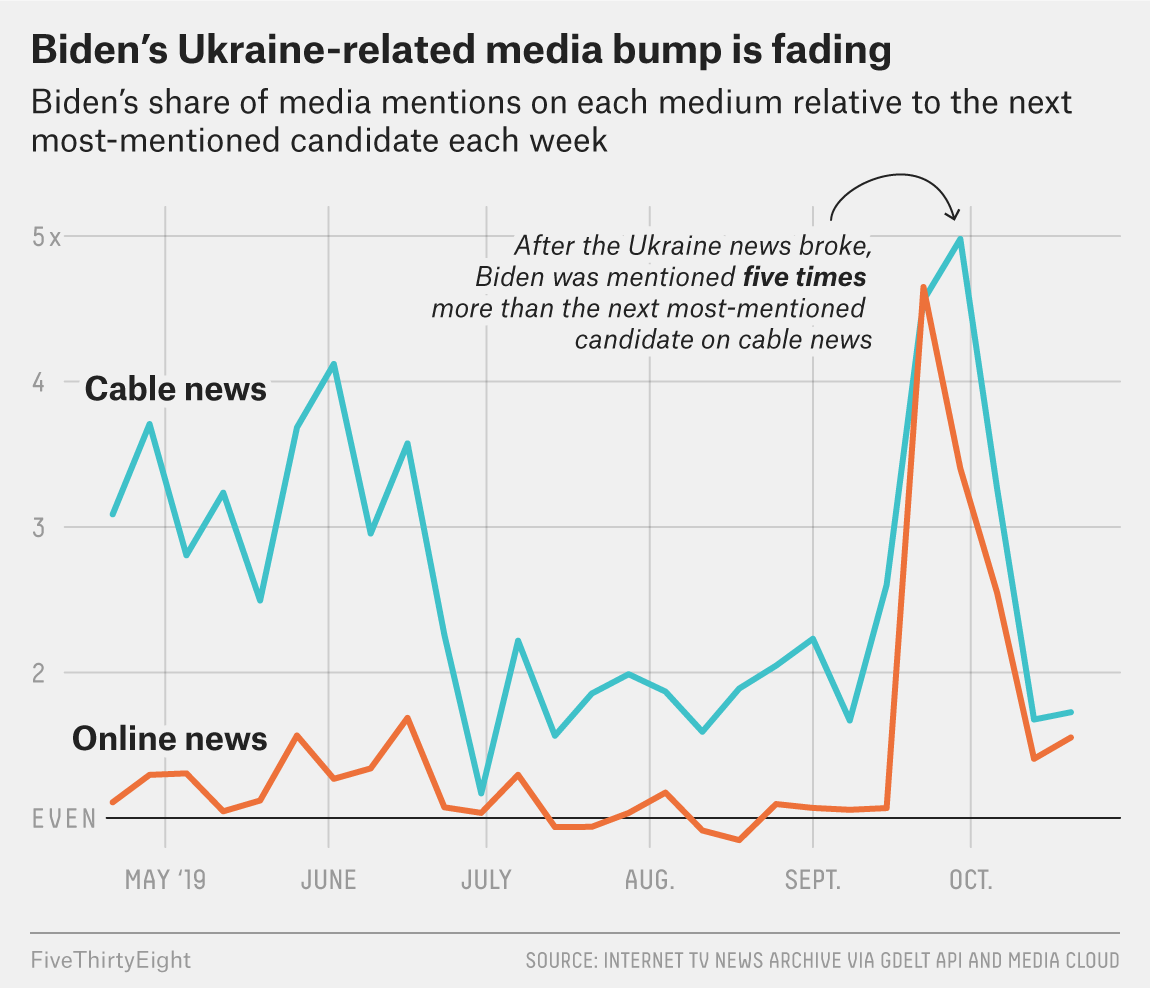

In [77]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.

**Expectations:** Your plot should include:
- 2 lines visualizing the Cable news vs Online news lines The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend **or** labels for the lines. (But **you don't need each label positioned next to its line or colored like 538.**)
- Title in the upper left: _"Biden's Ukraine-related media bump is fading"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Biden's share of media mentions on each medium relative ot the next most-mentioned candidate each week"_

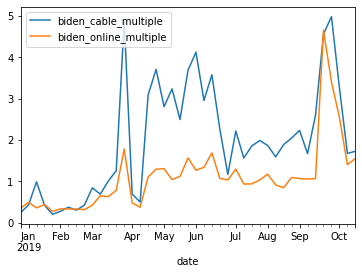

In [91]:
# Your Work Here
df.plot.line()


## How to get a 3 on this Sprint Challenge:

Once you have completed the above making a solid attempt at each section, if you still have time remaining, you can go back and do any of the following to get a score of 3 on the above sections. Remember that everything in this section is **optional** and that we will average your scores between the different sections, so get the easy points first!

Complete any of the following **within** their corresponding sections in the Sprint Challenge (go back up and add these thigns):

### Data Wrangling Section 1

Filter the `cell_phones` dataframe to only include information about the USA and China and then remake the scatterplot. 

### Data Wrangling Section 2

Explain why we are using an "inner" join when we merge these dataframes. 

### Data Wrangling Section 3

Modify the geo column to make the geo codes uppercase instead of lowercase.

### Data Wrangling Section 4

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### Data Storytelling 

Keep on working on your graph to make it look particularly like the 538 graph by manipulating the graph's background color, the line colors, the x and y axis tick marks/labels, etc. 

If you have already completed everything else, take this as far as you can within the time limit.
